In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

'dog.jpg'

In [3]:
image = mx.image.imread(image_filepath)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimun value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (576, 768, 3)
data type: <class 'numpy.uint8'>
minimun value: 0
maximum value: 255


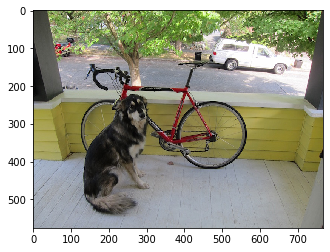

In [4]:
plt.imshow(image.asnumpy())

In [5]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
print('shape:', image.shape)
print('data type:', image.dtype)
print('minimun value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (1, 3, 512, 683)
data type: <class 'numpy.float32'>
minimun value: -2.117904
maximum value: 2.64


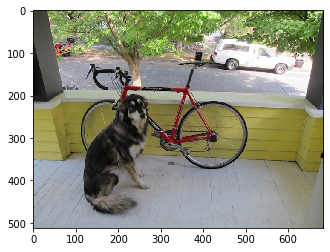

In [6]:
plt.imshow(chw_image)

In [7]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained = True)

In [8]:
! ls -sh /home/ec2-user/.mxnet/models/yolo3_darknet53_coco-09767802.params

237M /home/ec2-user/.mxnet/models/yolo3_darknet53_coco-09767802.params


In [9]:
prediction = network(image)

In [10]:
type(prediction)

tuple

In [11]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index + 1, array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


* The first array contains the object class indexes. 
* The second array contains the object class probabilities. 
* And the last array contains the object bounding box coordinates.

And our model can predict up to 100 objects in a single image.

So for the first array, with a shape of 1, 100, 1, we have 1 image, 100 potential objects, and 1 class index per object.

In [12]:
prediction = [array[0] for array in prediction]

In [13]:
class_indicies, probabilities, bounding_boxes = prediction

In [14]:
## Mostrando las clases con mayor probabilidad
k = 10
print(class_indicies[:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [15]:
network.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [16]:
class_index = 16
assert class_index > -1
print(network.classes[class_index])

dog


In [17]:
print(probabilities[:k])


[[ 0.9919528 ]
 [ 0.9600398 ]
 [ 0.62269706]
 [ 0.29241988]
 [ 0.01795176]
 [ 0.01141727]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [18]:
print(bounding_boxes[:k])


[[116.53648  201.33237  281.90326  482.0909  ]
 [ 93.92972  107.739395 504.7513   375.7542  ]
 [416.78833   69.800644 615.01794  148.89008 ]
 [416.78833   69.800644 615.01794  148.89008 ]
 [ 90.883545 125.878815 504.4449   402.7955  ]
 [532.78235   91.84184  547.3104   104.6911  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


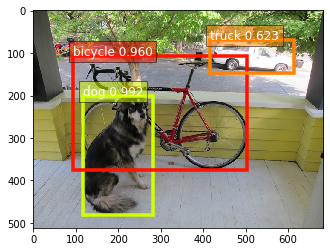

In [19]:
gcv.utils.viz.plot_bbox(chw_image, bounding_boxes, probabilities, class_indicies, class_names=network.classes)